# Data Ranges

In [ ]:
x|ymin and max options
move shared options here?

## Setup

In [2]:
__author__    = 'Steve Nicholes'
__copyright__ = 'Copyright (C) 2018 Steve Nicholes'
__license__   = 'GPL v3'
__version__   = '0.3.0'

### Imports

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
import sys
sys.path = [r'C:\GitHub\fivecentplots'] + sys.path
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
%matplotlib inline
#import matplotlib.pyplot as mpl

osjoin = os.path.join
st = pdb.set_trace
fcp

<module 'fivecentplots' from 'C:\\GitHub\\fivecentplots\\fivecentplots\\__init__.py'>

In [4]:
SHOW = False

### Read sample data

In [5]:
df = pd.read_csv(r'C:\GitHub\fivecentplots\fivecentplots\tests\fake_data.csv')

### Set theme

In [6]:
#fcp.set_theme('white')
#fcp.set_theme('gray')

## x|y min and max options

## Axes sharing

### Shared axes ranges (default)

By default, grid plots share axes and tick labels and x and y data ranges.

Wall time: 3.66 s


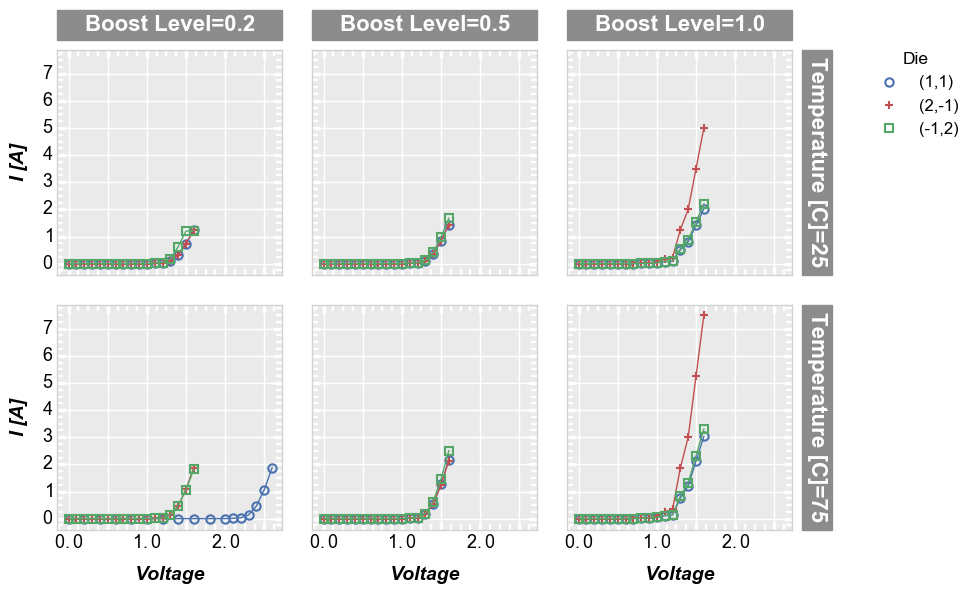

In [7]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               inline=True, show=False, ax_size=[225, 225])